# Click-Through Rate Prediction with Machine Learning

In any advertising agency, it is very important to predict the most profitable users who are very likely to respond to targeted advertisements. In this article, I’ll walk you through how to train a model for the task of click-through rate prediction with Machine Learning using Python.

By predicting the click-through rate, an advertising company select the most potential visitors who are most likely to respond to the ads, analyzing their browsing history and showing the most relevant ads based on the interest of the user.

This task is important for every advertising agency because the commercial value of promotions on the Internet depends only on how the user responds to them. A user’s response to ads is very valuable to every ad company because it allows the company to select the ads that are most relevant to users.

In the section below, I will take you how to create a model for the task of click-through rate prediction with Machine Learning using Python. This task is very important for the ones who want to work as a Data Scientist in any company which deals with advertisements like Google and Facebook.

### Click-Through Rate Prediction Model with Python

Now let’s get started with the task of click-through rate prediction model with Machine Learning by importing the dataset:

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import cv2
import plotly.graph_objects as go

%matplotlib inline

# Data Collections

In [88]:
data = pd.read_csv("data/advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [89]:
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [91]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Data Pre-Processing

Now let’s have a look at the data to see if we have any null values in the dataset:

In [92]:
data.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [93]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

### so there is no Null vlues in this dataset

Before moving forward, let’s have a look at the names of all the columns in the dataset:

In [94]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Now let’s prepare the data so that we can easily fit into the machine learning model. Here will drop some unnecessary columns:

In [95]:
data.drop(["Unnamed: 0"], inplace=True, axis=1)
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Now let’s visualize the relationship between the amount spent on advertising on TV and units sold

In [96]:
fig = px.scatter(data_frame= data, x='Sales', y="TV", size="TV", trendline="ols")
fig.update_layout(
    title="Visualization Sales of TV",
    xaxis_title="TV",
    yaxis_title="Sales",
    legend_title="Legend Title",
    font=dict(
        family="bell MT",
        size = 22,
        color="black",
    )
)
fig.show()


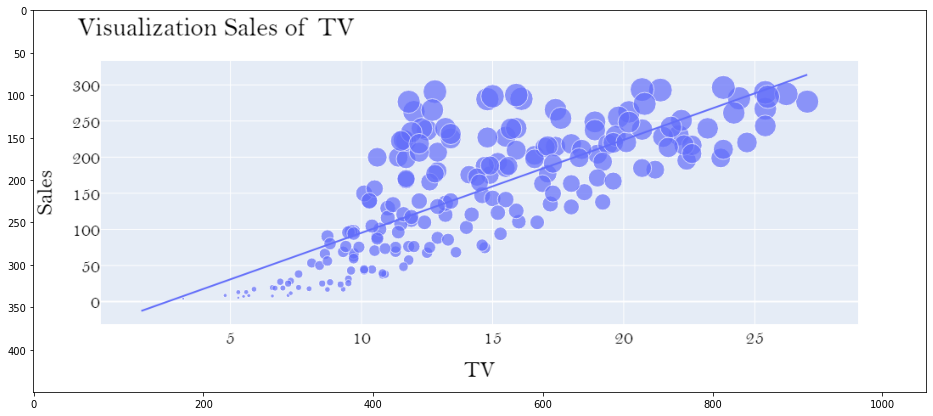

In [97]:
img = cv2.imread("img/TV.png",)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,20))
# plt.rc("font", size=20, weight="bold")
# plt.title("Visualization Sales of TV", fontsize=22, weight="bold", color="red")
plt.imshow(img)

### Now let’s visualize the relationship between the amount spent on advertising on Radio and units sold

In [98]:
fig = px.scatter(data_frame= data, x="Sales", y="Radio", size="Radio", trendline="ols")
fig.update_layout(
    title = "Sales of Radio",
    xaxis_title="Radio",
    yaxis_title="Sales",
    font = dict(
        size= 22,
        family = "Arial",
        color= "red"
    )

)
fig.show()

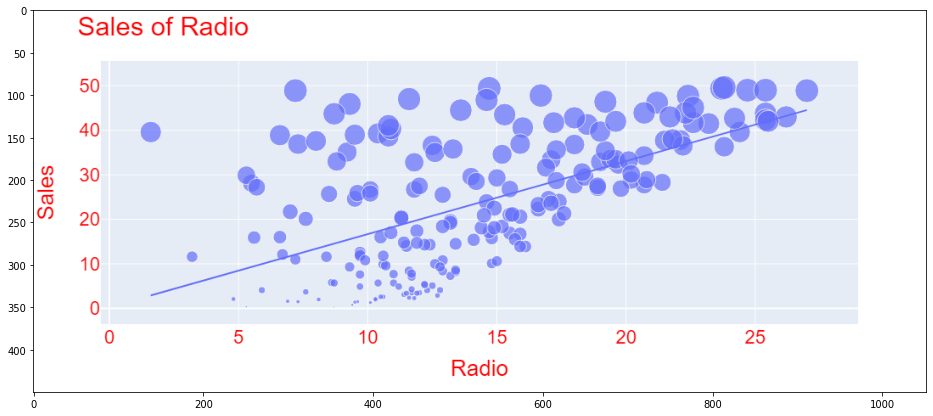

In [99]:
img = cv2.imread("img/Radio.png",)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16, 20))
# plt.rc("font", size=20, weight="bold")
# plt.title("Visualization Sales of TV", fontsize=22, weight="bold", color="red")
plt.imshow(img)


### Now let’s visualize the relationship between the amount spent on advertising on newspapers and units sold

In [100]:
fig = px.scatter(data_frame=data, x="Sales", y="Newspaper",
                 size="Newspaper", trendline="ols")
fig.update_layout(
    title="Sales of Newspaper",
    xaxis_title="",
    yaxis_title="Sales",
    font=dict(
        size=22,
        family="Arial",
        color="black"
    )

)
fig.show()

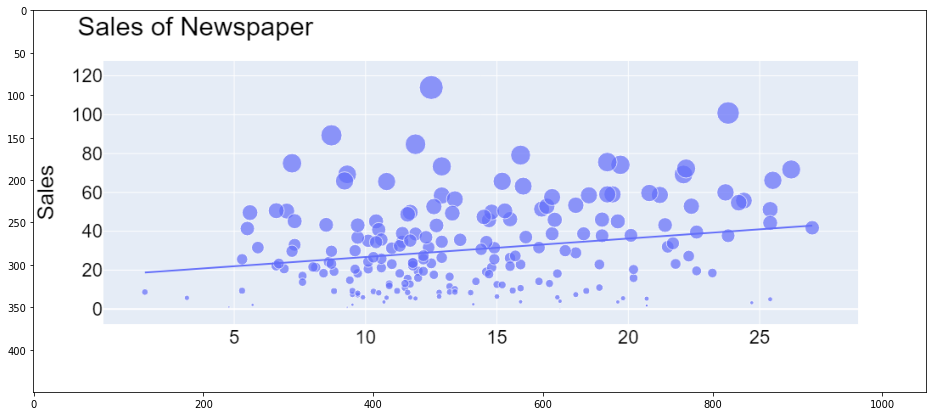

In [101]:
img = cv2.imread("img/Newspaper.png",)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16, 20))
# plt.rc("font", size=20, weight="bold")
# plt.title("Visualization Sales of TV", fontsize=22, weight="bold", color="red")
plt.imshow(img)

Out of all the amount spent on advertising on various platforms, I can see that the amount spent on advertising the product on TV results in more sales of the product. Now let’s have a look at the correlation of all the columns with the sales column

In [102]:
correlation = data.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64


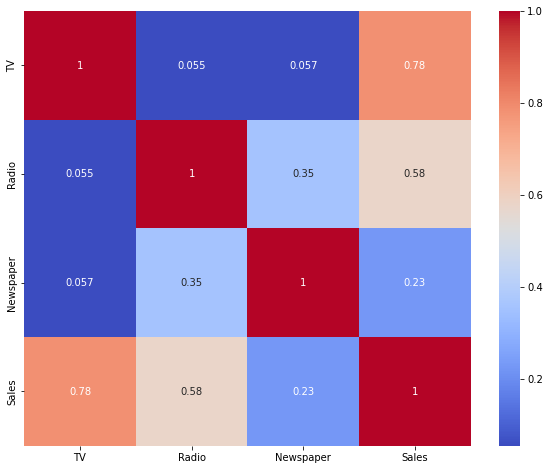

In [103]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.show()

## Feature Selection

In [104]:
feature = np.array(data.drop(["Sales"], 1))
target = np.array(data["Sales"])

C:\Users\User\AppData\Local\Temp\ipykernel_10356\504501468.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



## Spliting Data

In [105]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size=0.3, random_state=4)

In [106]:
print(xtrain.shape)
print(ytrain.shape)

(140, 3)
(140,)


In [107]:
print(xtest.shape)
print(ytest.shape)


(60, 3)
(60,)


# Linear Regression Model

#### Now I will use the Linear Regression model to predict the click-through rate of the users

In [108]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(xtrain, ytrain)

LinearRegression()

In [109]:
y_pred = lr_model.predict(xtest)
print(y_pred)

[17.09777441 16.86148273 21.7761552  24.53812602 12.32008724 20.9083371
 10.09857022 12.38326275 12.01767713 16.939182   22.8039863  15.18438755
  8.45988902 14.86958246 18.5360064  18.5391287  18.67614759 14.5131948
  9.74192603 20.57441729 14.89243548 17.70102466 23.04193509  7.718106
 21.42075683 19.62792915 13.79733409 11.63827129 18.42655599 12.19463761
 11.40777433  9.96083851 13.49436555 15.18912412 18.09830593  6.92815403
 14.21050378 14.27217178 14.10451207 10.77723418 14.82936609 11.96507878
 10.69651541 10.40851022  6.21159776 16.82112487 16.4659736  12.07626636
 10.75281419 20.84690688 15.09266208 15.39499668 13.27964587 14.1081843
 12.38574411  9.03289588 20.48246311  9.3517132   5.36311192  8.24848891]


# Model Score

In [110]:
print(lr_model.score(xtest, ytest))

0.9127220729596172


# Sheikh Rasel Ahmed

##### Data Science || Machine Learning || Deep Learning || Artificial Intelligence Enthusiast

In [111]:
# LinkedIn - https://www.linkedin.com/in/shekhnirob1

# GitHub - https://github.com/Rasel1435

# Behance - https://www.behance.net/Shekhrasel2513